<a href="https://colab.research.google.com/github/IsabellaGarciaS/Biosignals/blob/main/Proyecto2_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Proyecto 2</center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>

In [96]:
#Instalo las librerias necesarias
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from csv import reader as reader_csv;
import scipy.signal as signal;
import pandas as pd
import glob
import math
import os
import shutil
from scipy.stats import linregress
from scipy.signal import find_peaks
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
from itertools import combinations
from scipy.stats import levene
from scipy.stats import kstest

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


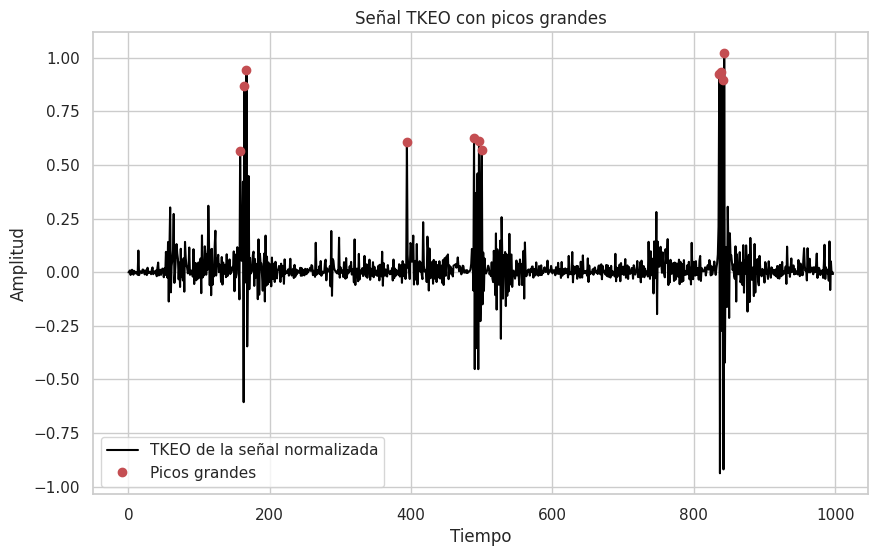

In [97]:
def tkeo(signal): #función para aplicar el operador TKEO a una señal
    tkeo_signal = np.square(signal[1:-1]) - (signal[:-2] * signal[2:])
    return tkeo_signal

#ruta del archivo
ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujeto1.txt"
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()


signal = np.array([float(dato.strip()) for dato in datos]) #convertir los datos a una lista de valores numéricos
signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal
tkeo_signal = tkeo(signal_normalized) #aplicar el operador TKEO a la señal normalizada

#encontrar los índices de los picos grandes en la señal TKEO
umbral_pico = 0.5  #umbral para considerar un pico como grande
indices_picospicos_grandes = np.where(tkeo_signal > umbral_pico)[0]

#gráfica de la señal TKEO con los picos grandes resaltados
plt.figure(figsize=(10, 6))
plt.plot(tkeo_signal, label='TKEO de la señal normalizada', color='black')
plt.plot(indices_picospicos_grandes, tkeo_signal[indices_picospicos_grandes], 'ro', label='Picos grandes')
plt.title('Señal TKEO con picos grandes')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


In [98]:
#para confirmamr la ubicacion de los datos de los sujetos

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado"

archivos = os.listdir(carpeta_principal) #obtener la lista de archivos en la carpeta
print(archivos)

archivos[0]

['sujeto1_etiquetado.txt', 'sujeto2_etiquetado.txt', 'sujeto3_etiquetado.txt', 'sujeto4_etiquetado.txt', 'sujeto5_etiquetado.txt', 'sujeto6_etiquetado.txt', 'sujeto7_etiquetado.txt', 'sujeto8_etiquetado.txt', 'sujeto9_etiquetado.txt', 'sujeto10_etiquetado.txt']


'sujeto1_etiquetado.txt'

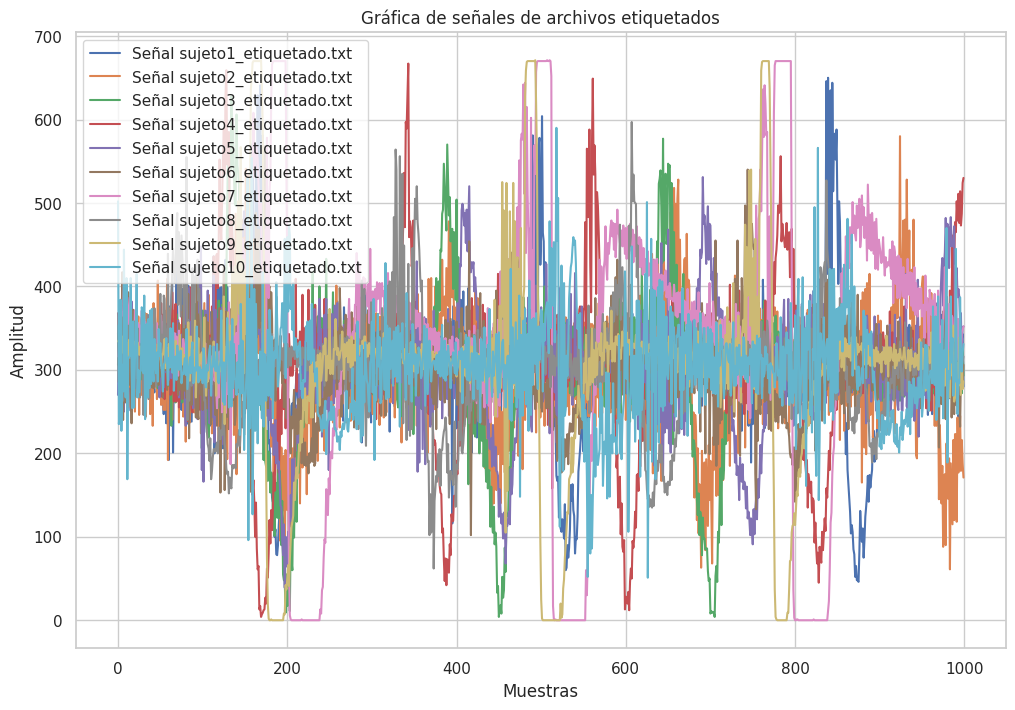

In [99]:
archivos = [archivo for archivo in os.listdir(carpeta_principal) if archivo.endswith('.txt')] #obtener la lista de archivos en la carpeta

plt.figure(figsize=(12, 8)) #configura la gráfica

for archivo in archivos: #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #ruta completa del archivo
    with open(ruta_archivo, 'r') as file: #lee los datos del archivo
        datos = file.readlines()

    #extraer la primera columna (datos de la señal)
    signal = [float(dato.strip().split()[0]) for dato in datos]

    #graficar la señal
    plt.plot(signal, label=f'Señal {archivo}')

plt.title('Gráfica de señales de archivos etiquetados')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


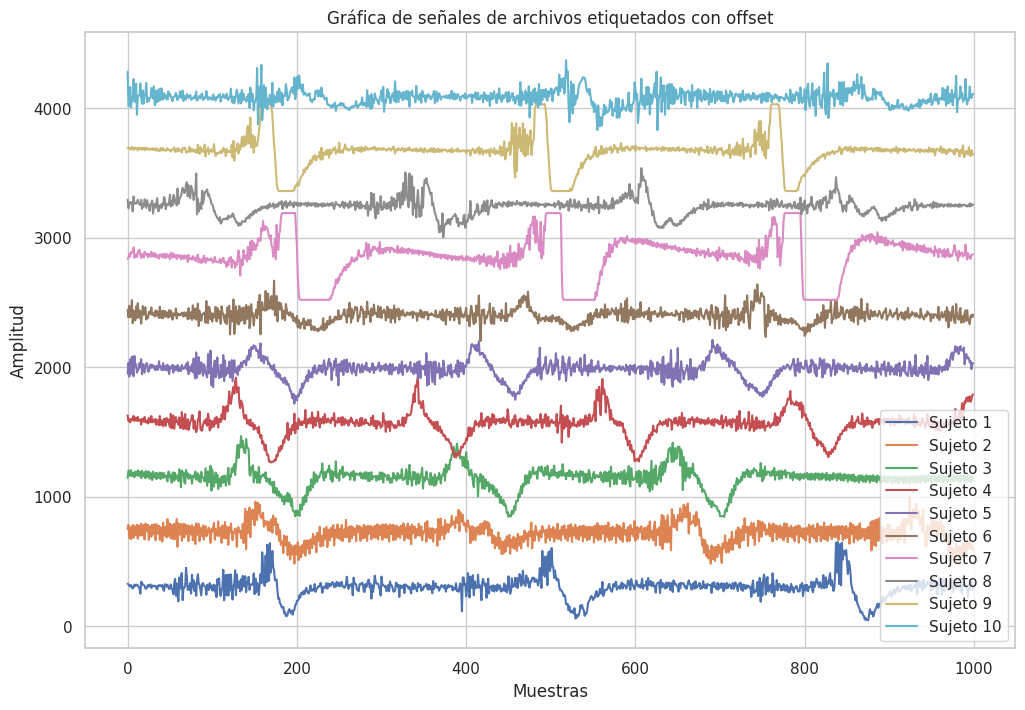

In [100]:
#configuramos la grafica anterior con offset para tener una apreciacion mejor de las disntintas señales adquiridas

plt.figure(figsize=(12, 8)) #configura la gráfica su tamaño

for i, archivo in enumerate(archivos): #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #ruta completa del archivo
    with open(ruta_archivo, 'r') as file: #lee los datos del archivo
        datos = file.readlines()

    signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #extraer la primera columna (datos de la señal)

    #aplicar un offset a la señal para visualizarla mejor
    offset = 420 * i
    signal_offset = signal + offset

    #graficar la señal
    plt.plot(signal_offset, label=f'Sujeto {i+1}')

plt.title('Gráfica de señales de archivos etiquetados con offset')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

**1. Crear una función que reciba la señal de EMG y permita aplicar el operador**
---

Teager-Kaiser Energy Operator (TKEO). (10 %)

Antes de aplicar el operado, se normalizo la señal dividiendo por el valor máximo absoluto, el operador TKEO sirve para resaltar características no lineales de nuestros datos

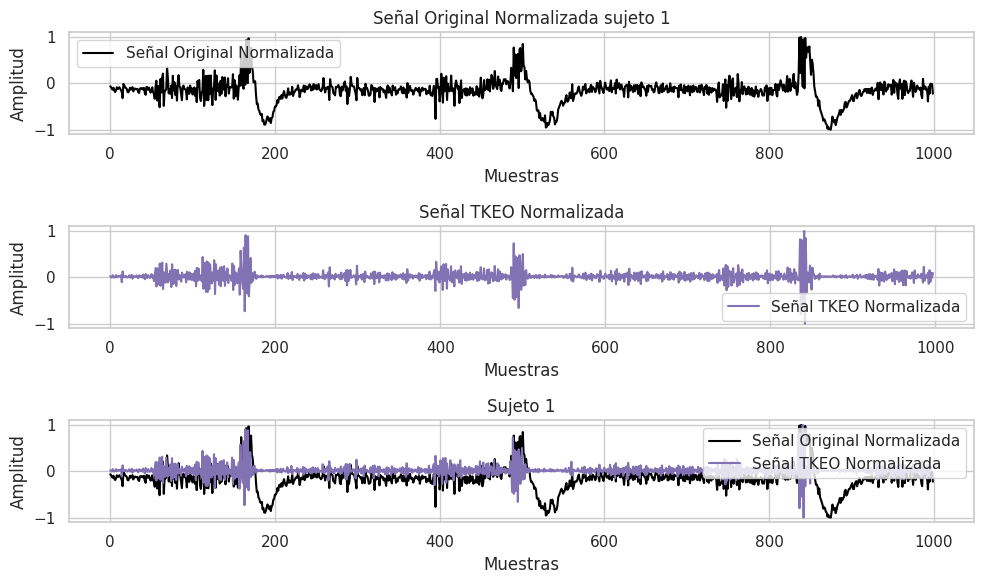

In [101]:
def tkeo(signal): #función para aplicar el operador TKEO a una señal
    tkeo_signal = np.square(signal[1:-1]) - (signal[:-2] * signal[2:])
    return tkeo_signal


ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/sujeto1_etiquetado.txt" #ruta del archivo a procesar
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()

#convertir los datos a una lista de valores numéricos y etiquetas de gestos
signal = np.array([float(dato.strip().split()[0]) for dato in datos])
gestos = [dato.strip().split()[1] for dato in datos]


tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal original y la señal TKEO
tkeo_signal_normalized = (tkeo_signal - np.min(tkeo_signal)) / (np.max(tkeo_signal) - np.min(tkeo_signal)) * 2 - 1

#graficar la señal original y la señal TKEO normalizadas
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
plt.title('Señal Original Normalizada sujeto 1')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
plt.title('Señal TKEO Normalizada')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
plt.title('Sujeto 1')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()



**2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal**

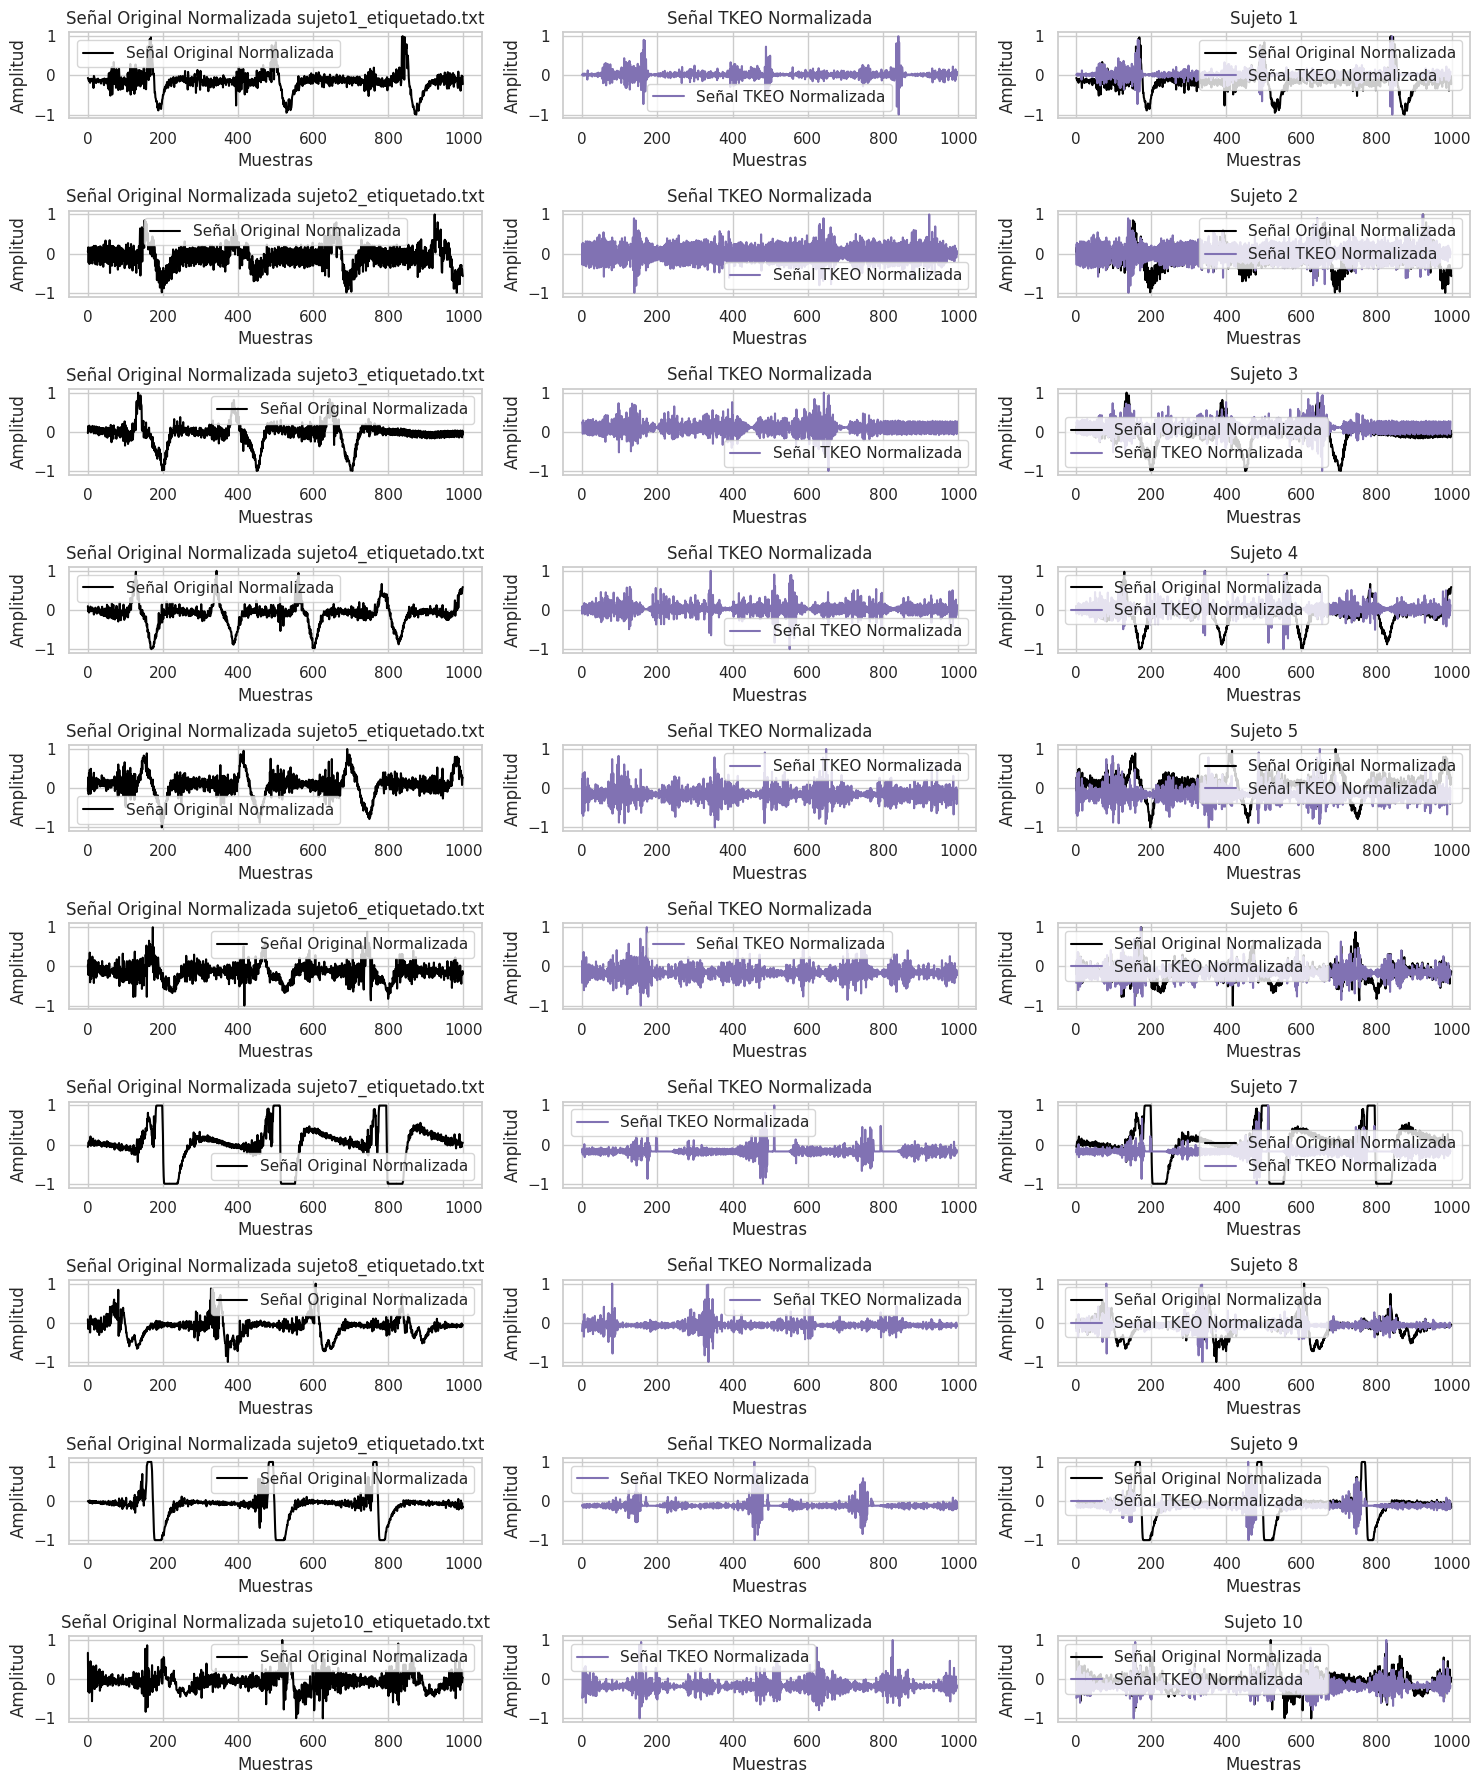

In [102]:
#configurar la gráfica
plt.figure(figsize=(15, 18))

for i, archivo in enumerate(archivos): #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #construir la ruta completa del archivo

    with open(ruta_archivo, 'r') as file:  # Leer los datos del archivo
        datos = file.readlines()

    signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
    gestos = [dato.strip().split()[1] for dato in datos]

    tkeo_signal = tkeo(signal) # Aplicar el operador TKEO a la señal
    signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal original y la señal TKEO
    tkeo_signal_normalized = (tkeo_signal - np.min(tkeo_signal)) / (np.max(tkeo_signal) - np.min(tkeo_signal)) * 2 - 1

    #fraficar la señal original y la señal TKEO normalizadas
    plt.subplot(len(archivos), 3, i*3 + 1)
    plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
    plt.title(f'Señal Original Normalizada {archivo}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(len(archivos), 3, i*3 + 2)
    plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
    plt.title('Señal TKEO Normalizada')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(len(archivos), 3, i*3 + 3)
    plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
    plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
    plt.title(f'Sujeto {i+1}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

plt.tight_layout()
plt.show()


**3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal (esto solo lo hacemos para el sujeto 1)**
--
- RMS
- Varianza
- Mean Absolute Value
- Mean Absolute Value Slope
- Slope Sign Changes
- Wave form length
- Zero Crossing



In [103]:
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0) #rellenar los bordes con ceros

    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:]) #aplicar el operador TKEO
    return tkeo_signal

def extract_features_tkeo(signal, tkeo_signal, gestos):
    features = []
    gestos_unicos = set(gestos)

    for gesto in gestos_unicos:
        indices = [i for i, g in enumerate(gestos) if g == gesto]
        signal_gesto = signal[indices]
        tkeo_signal_gesto = tkeo_signal[indices]

        rms = np.sqrt(np.mean(signal_gesto ** 2))  #RMS
        rms_tkeo = np.sqrt(np.mean(tkeo_signal_gesto ** 2))
        varianza = np.var(signal_gesto) #varianza
        varianza_tkeo = np.var(tkeo_signal_gesto)
        mean_absolute_value = np.mean(np.abs(signal_gesto)) #mean Absolute Value
        mean_absolute_value_tkeo = np.mean(np.abs(tkeo_signal_gesto))
        diff_signal = np.diff(signal_gesto) #mean Absolute Value Slope
        diff_tkeo_signal = np.diff(tkeo_signal_gesto)
        mean_absolute_value_slope = np.mean(np.abs(diff_signal))
        mean_absolute_value_slope_tkeo = np.mean(np.abs(diff_tkeo_signal))
        slope_sign_changes = np.sum(np.abs(np.diff(np.sign(diff_signal)))) / 2 #slope Sign Changes
        slope_sign_changes_tkeo = np.sum(np.abs(np.diff(np.sign(diff_tkeo_signal)))) / 2
        wave_form_length = np.sum(np.abs(diff_signal)) # Wave form length
        wave_form_length_tkeo = np.sum(np.abs(diff_tkeo_signal))
        zero_crossing = np.sum(np.abs(np.diff(signal_gesto > 0))) / 2 #zero Crossing
        zero_crossing_tkeo = np.sum(np.abs(np.diff(tkeo_signal_gesto > 0))) / 2

        features.append([gesto, rms, varianza, mean_absolute_value, mean_absolute_value_slope, slope_sign_changes, wave_form_length, zero_crossing, rms_tkeo, varianza_tkeo, mean_absolute_value_tkeo, mean_absolute_value_slope_tkeo, slope_sign_changes_tkeo, wave_form_length_tkeo, zero_crossing_tkeo])

    return features

ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/sujeto1_etiquetado.txt" #ruta del archivo a procesa
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()

signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convierte los datos a una lista de valores numéricos y etiquetas de gestos
gestos = [dato.strip().split()[1] for dato in datos]

tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
features = extract_features_tkeo(signal, tkeo_signal, gestos) #extraer las características para cada gesto

#imprimir las características
for feature in features:
    print(f"Gesto (señal con TKEO): {feature[0]}")
    print(f"RMS : {feature[8]}")
    print(f"Varianza : {feature[9]}")
    print(f"Mean Absolute Value : {feature[10]}")
    print(f"Mean Absolute Value Slope : {feature[11]}")
    print(f"Slope Sign Changes : {feature[12]}")
    print(f"Wave form length : {feature[13]}")
    print(f"Zero Crossing : {feature[14]}")

    print()

Gesto (señal con TKEO): 0
RMS : 45254.81609502239
Varianza : 1689021610.3349001
Mean Absolute Value : 25401.28513238289
Mean Absolute Value Slope : 30404.557142857142
Slope Sign Changes : 331.0
Wave form length : 14898233.0
Zero Crossing : 107.0

Gesto (señal con TKEO): 1
RMS : 40557.83337413291
Varianza : 1437714187.0789676
Mean Absolute Value : 23793.398821218074
Mean Absolute Value Slope : 30957.36220472441
Slope Sign Changes : 353.0
Wave form length : 15726340.0
Zero Crossing : 124.5



**4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3**
--


In [104]:
def process_subjects_data(folder_path):
    all_features = []

    archivos = os.listdir(folder_path)  #obtener la lista de archivos en la carpeta
    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo

        with open(ruta_archivo, 'r') as file:  #leer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #alicar el operador TKEO a la señal
        features = extract_features_tkeo(signal, tkeo_signal, gestos) #extraer las características para cada gesto


        print(f"Características de la señal EMG para el archivo {archivo}:") #mensaje indicando el archivo procesado
        #imprimir las características del sujeto
        for feature in features:
            print(f"Gesto: {feature[0]}")
            print(f"RMS (TKEO): {feature[1]}")
            print(f"Varianza (TKEO): {feature[2]}")
            print(f"Mean Absolute Value (TKEO): {feature[3]}")
            print(f"Mean Absolute Value Slope (TKEO): {feature[4]}")
            print(f"Slope Sign Changes (TKEO): {feature[5]}")
            print(f"Wave form length (TKEO): {feature[6]}")
            print(f"Zero Crossing (TKEO): {feature[7]}")
            print()

        all_features.extend(features) #agregar las características del sujeto a la lista general

    return all_features

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta
all_subjects_features = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos


Características de la señal EMG para el archivo sujeto1_etiquetado.txt:
Gesto: 0
RMS (TKEO): 322.8615846633412
Varianza (TKEO): 7300.5901170146135
Mean Absolute Value (TKEO): 311.3503054989817
Mean Absolute Value Slope (TKEO): 40.56530612244898
Slope Sign Changes (TKEO): 310.0
Wave form length (TKEO): 19877.0
Zero Crossing (TKEO): 0.0

Gesto: 1
RMS (TKEO): 298.82598375277763
Varianza (TKEO): 5063.595493301322
Mean Absolute Value (TKEO): 290.229862475442
Mean Absolute Value Slope (TKEO): 40.22047244094488
Slope Sign Changes (TKEO): 321.0
Wave form length (TKEO): 20432.0
Zero Crossing (TKEO): 0.0

Características de la señal EMG para el archivo sujeto2_etiquetado.txt:
Gesto: 0
RMS (TKEO): 340.7925586549055
Varianza (TKEO): 4710.495192868371
Mean Absolute Value (TKEO): 333.8099352051836
Mean Absolute Value Slope (TKEO): 46.94155844155844
Slope Sign Changes (TKEO): 350.0
Wave form length (TKEO): 21687.0
Zero Crossing (TKEO): 0.0

Gesto: 1
RMS (TKEO): 284.202048671845
Varianza (TKEO): 5300.

**5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales**

In [105]:
def extraer_caracteristicas_emg(signal_emg):

    rms = np.sqrt(np.mean(np.square(signal_emg))) #calcular RMS (Root Mean Square)
    varianza = np.var(signal_emg) #calcular Varianza
    mav = np.mean(np.abs(signal_emg)) #calcular Mean Absolute Value (MAV)
    mav_slope = np.mean(np.abs(np.diff(signal_emg))) #calcular Mean Absolute Value Slope (MAV Slope)
    diff_signal = np.diff(signal_emg) #calcular Slope Sign Changes
    ssc = np.sum(np.diff(np.sign(diff_signal)) != 0)
    wl = np.sum(np.abs(np.diff(signal_emg))) #calcular Waveform Length (WL)
    zc = np.sum(np.abs(np.diff(np.sign(signal_emg))) > 0) #calcular Zero Crossing (ZC)

    return rms, varianza, mav, mav_slope, ssc, wl, zc #devolver las características calculadas

for archivo in archivos: #iterar sobre cada archivo .txt en el directorio
    if archivo.endswith(".txt"):


        datos = np.loadtxt(ruta_archivo, dtype=str) #leer los datos del archivo
        gestos_unicos = np.unique(datos[:, 1]) #extraer los gestos únicos de la segunda columna

        print(f"Características de la señal EMG para el archivo {archivo}:")

        for gesto in gestos_unicos: #iterar sobre cada gesto único y calcular las características de la señal EMG para ese gesto
            datos_gesto = datos[datos[:, 1] == gesto][:, 0].astype(float) #filtrar los datos correspondientes al gesto actual

            #llamar a la función para extraer las características de la señal EMG para el gesto actual
            rms, varianza, mav, mav_slope, ssc, wl, zc = extraer_caracteristicas_emg(datos_gesto)

            print(f"Gesto (señal original): '{gesto}':")  #imprimir las características calculadas para el gesto actual
            print(f"RMS: {rms}")
            print(f"Varianza: {varianza}")
            print(f"Mean Absolute Value (MAV): {mav}")
            print(f"Mean Absolute Value Slope (MAV Slope): {mav_slope}")
            print(f"Slope Sign Changes (SSC): {ssc}")
            print(f"Waveform Length (WL): {wl}")
            print(f"Zero Crossing (ZC): {zc}")
            print()

        print()

Características de la señal EMG para el archivo sujeto1_etiquetado.txt:
Gesto (señal original): '0':
RMS: 322.8615846633412
Varianza: 7300.5901170146135
Mean Absolute Value (MAV): 311.3503054989817
Mean Absolute Value Slope (MAV Slope): 40.56530612244898
Slope Sign Changes (SSC): 316
Waveform Length (WL): 19877.0
Zero Crossing (ZC): 0

Gesto (señal original): '1':
RMS: 298.82598375277763
Varianza: 5063.595493301322
Mean Absolute Value (MAV): 290.229862475442
Mean Absolute Value Slope (MAV Slope): 40.22047244094488
Slope Sign Changes (SSC): 324
Waveform Length (WL): 20432.0
Zero Crossing (ZC): 0


Características de la señal EMG para el archivo sujeto2_etiquetado.txt:
Gesto (señal original): '0':
RMS: 322.8615846633412
Varianza: 7300.5901170146135
Mean Absolute Value (MAV): 311.3503054989817
Mean Absolute Value Slope (MAV Slope): 40.56530612244898
Slope Sign Changes (SSC): 316
Waveform Length (WL): 19877.0
Zero Crossing (ZC): 0

Gesto (señal original): '1':
RMS: 298.82598375277763
Varia

**6. Almanecene las métricas obtenidas en el ítem 4 y 5 en un dataframe, en donde haya una columna que discrimine si las caracteristicas proviene de una señal con TKEO o sin TKEO**
--

In [106]:
import numpy as np
import pandas as pd
import os

# Función para calcular características de una señal EMG
def calculate_features(signal):
    rms = np.sqrt(np.mean(signal ** 2))
    varianza = np.var(signal)
    mean_absolute_value = np.mean(np.abs(signal))
    mean_absolute_value_slope = np.mean(np.abs(np.diff(signal)))
    slope_sign_changes = np.sum(np.abs(np.diff(np.sign(np.diff(signal)))) != 0)
    wave_form_length = np.sum(np.abs(np.diff(signal)))
    zero_crossing = np.sum(np.abs(np.diff(signal > 0)))

    return rms, varianza, mean_absolute_value, mean_absolute_value_slope, \
           slope_sign_changes, wave_form_length, zero_crossing

# Función para procesar los datos de todos los sujetos
def process_subjects_data(folder_path):
    all_features = []

    archivos = os.listdir(folder_path)
    for archivo in archivos:
        ruta_archivo = os.path.join(folder_path, archivo)

        with open(ruta_archivo, 'r') as file:
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos])
        gestos = [dato.strip().split()[1] for dato in datos]

        # Calcular características para la señal sin TKEO
        features_without_tkeo = {}
        for gesture in set(gestos):
            indices_gesture = [i for i, g in enumerate(gestos) if g == gesture]
            signal_gesture = signal[indices_gesture]
            features_without_tkeo[gesture] = calculate_features(signal_gesture)

        # Calcular características para la señal con TKEO
        tkeo_signal = tkeo(signal)
        features_with_tkeo = {}
        for gesture in set(gestos):
            indices_gesture = [i for i, g in enumerate(gestos) if g == gesture]
            tkeo_gesture = tkeo_signal[indices_gesture]
            features_with_tkeo[gesture] = calculate_features(tkeo_gesture)

        # Agregar características a la lista general
        for gesture in set(gestos):
            features = list(features_without_tkeo[gesture]) + [gesture, False, archivo]
            all_features.append(features)
            features = list(features_with_tkeo[gesture]) + [gesture, True, archivo]
            all_features.append(features)

    return all_features

# Ruta de la carpeta principal
carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado"

# Procesar los datos de todos los sujetos
all_subjects_features = process_subjects_data(carpeta_principal)

# Crear DataFrame con las características
columns = ["RMS", "Varianza", "Mean Absolute Value", "Mean Absolute Value Slope",
           "Slope Sign Changes", "Wave form length", "Zero Crossing", "Gesto", "TKEO", "Archivo"]

df = pd.DataFrame(all_subjects_features, columns=columns)

# Mostrar el DataFrame
print(df)

             RMS      Varianza  Mean Absolute Value  \
0     322.861585  7.300590e+03           311.350305   
1   45254.816095  1.689022e+09         25401.285132   
2     298.825984  5.063595e+03           290.229862   
3   40557.833374  1.437714e+09         23793.398821   
4     340.792559  4.710495e+03           333.809935   
5   52387.324223  1.436998e+09         43379.816415   
6     284.202049  5.300381e+03           274.718808   
7   50677.543048  1.874945e+09         42858.033520   
8     330.376845  8.110175e+03           317.865828   
9   32517.269341  6.923796e+08         24191.020964   
10    302.802424  7.757789e+03           289.709369   
11  32181.124266  8.198028e+08         24484.261950   
12    307.258348  8.966272e+03           292.303644   
13  29006.247271  6.615028e+08         20461.026316   
14    332.736412  9.233499e+03           318.559289   
15  33550.475476  8.655292e+08         22658.739130   
16    328.313736  5.323783e+03           320.103306   
17  37330.

**7. Realice un análisis exploratorio de los datos (Estadística descriptiva) teniendo como base la teoría vista en clase (Diagramas de cajas, gráficos, medidas de tendencia central)**
--

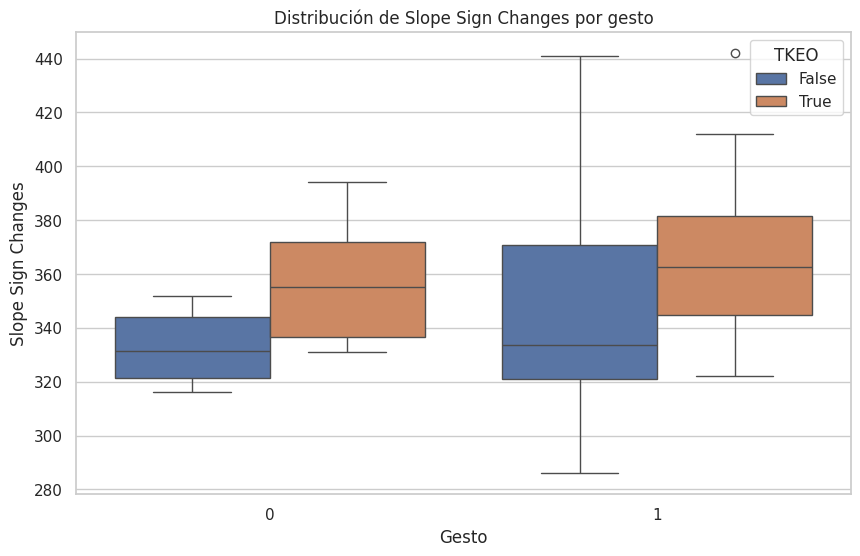

In [107]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Gráfico de caja (boxplot) para la característica "Slope Sign Changes" por gesto
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Gesto', y='Slope Sign Changes', hue='TKEO', data=df)

# Añadir título y ajustes de los ejes
plt.title('Distribución de Slope Sign Changes por gesto')
plt.xlabel('Gesto')
plt.ylabel('Slope Sign Changes')
plt.legend(title='TKEO')

# Mostrar el gráfico
plt.show()

Como parte del análisis estadístico se decidió hacer el boxplot del SSC (SLOPE SIGN CHANGES), para mostrar las distribuciones de cambios de signos de la pendiente para cada gesto con tkeo y sin tkeo en todos los sujetos, para lograr identificar posibles diferencias en los cambios de la dirección de la tendencia de los datos para los dos gestos generados y como el operador cambia su valor.

Las medianas para los gestos con y sin TKEO muestran diferencias significativas. Para el gesto 0 (extensión) sin TKEO, la mediana es aproximadamente 320, mientras que con TKEO es cerca de 355. Esto sugiere que el TKEO afecta notablemente la dirección y la magnitud de los cambios de pendiente. Por otro lado, la mediana del gesto 1 (flexión) sin TKEO es similar a la del gesto 0 sin TKEO, alrededor de 320, pero con TKEO aumenta a alrededor de 365, mostrando nuevamente una influencia significativa del TKEO en la mediana. Para los gestos con TKEO, la distribución entre los cuartiles 1 y 3 es uniforme, lo que sugiere una variabilidad relativamente equilibrada en los datos. Sin embargo, para el gesto 1 sin TKEO, la mayoría de los datos pertenecen al tercer cuartil, lo que indica una concentración de datos en valores más altos de SSC. Esto sugiere una mayor variabilidad en la dirección de la pendiente para el gesto 1 sin TKEO en comparación con el gesto 1 con TKEO.

Se identifica un dato atípico en el gesto 1, lo que sugiere una posible anomalía en ese caso particular. Este dato atípico debería ser revisado y evaluado para determinar si está afectando el comportamiento general del modelo. La presencia de datos atípicos puede influir en las conclusiones del análisis y debe ser considerada en la interpretación de los resultados.

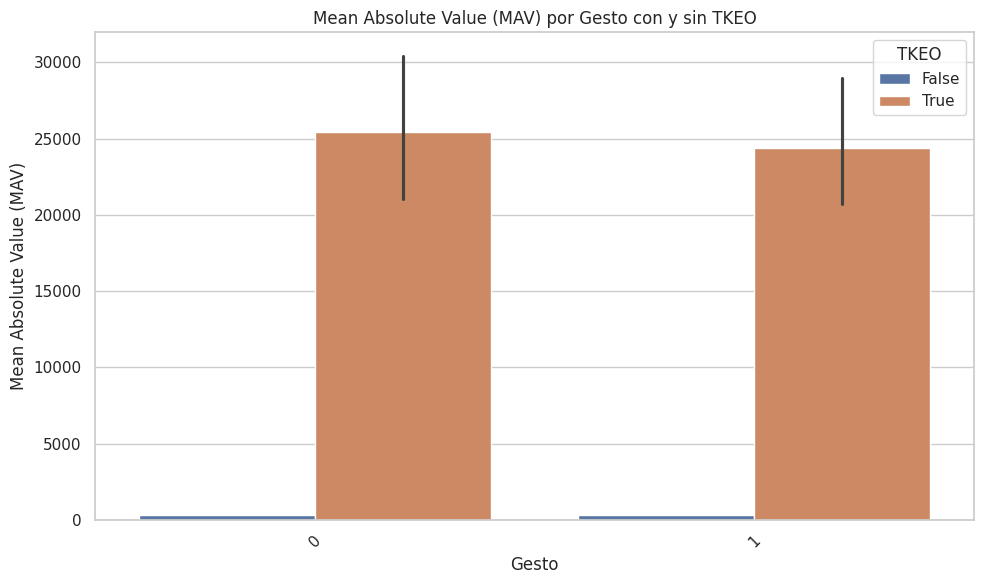

In [108]:
# Filtrar el DataFrame solo para el Mean Absolute Value (MAV)
mav_data = df[df["Gesto"].isin(df["Gesto"].unique())][["Gesto", "Mean Absolute Value", "TKEO"]]

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras para el MAV por gesto con y sin TKEO
plt.figure(figsize=(10, 6))
sns.barplot(x="Gesto", y="Mean Absolute Value", hue="TKEO", data=mav_data)
plt.title("Mean Absolute Value (MAV) por Gesto con y sin TKEO")
plt.xlabel("Gesto")
plt.ylabel("Mean Absolute Value (MAV)")
plt.legend(title="TKEO", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que para ambos gestos (extensión y flexión), los valores del MAV con TKEO son significativamente mayores que los valores sin TKEO. Esto sugiere que el algoritmo TKEO está siendo efectivo en aumentar la magnitud del MAV, posiblemente resaltando mejor las características de interés en la señal de electromiografía (EMG).
Se puede detallar que el valor de MAV para la extensión (gesto 0) con TKEO es mayor que para la flexión (gesto 1) con TKEO. Esto podría indicar que la actividad muscular durante la extensión del brazo es, en promedio, más intensa que durante la flexión, al menos en términos de la magnitud de la señal de EMG capturada. Por otro lado, Los valores del MAV para ambos gestos sin TKEO son muy parecidos. Esto puede sugerir que, sin la aplicación del algoritmo TKEO, las diferencias en la magnitud de la señal de EMG entre los gestos de extensión y flexión no son tan evidentes. Esto podría ser debido a la presencia de ruido o la falta de resolución en la señal sin procesar.

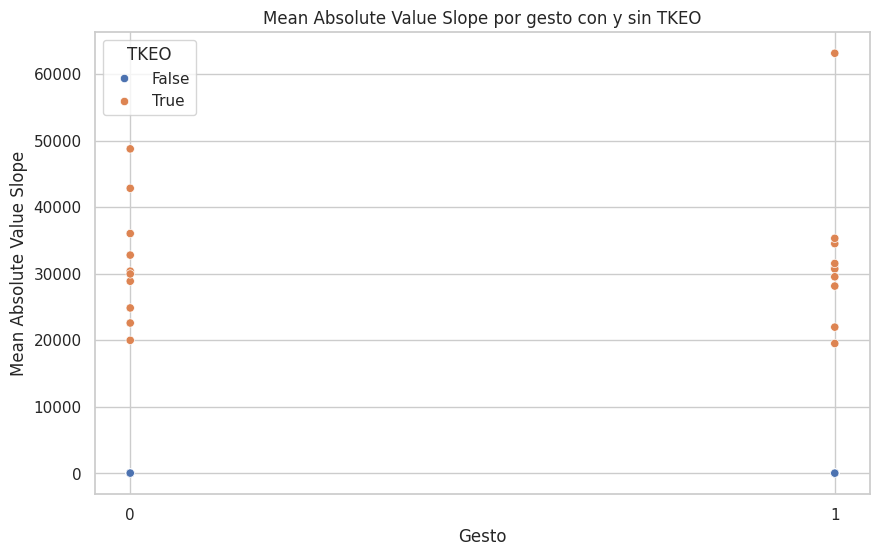

In [109]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Gesto", y="Mean Absolute Value Slope", hue="TKEO", data=df)
plt.title("Mean Absolute Value Slope por gesto con y sin TKEO")
plt.xlabel("Gesto")
plt.ylabel("Mean Absolute Value Slope")
plt.legend(title="TKEO")
plt.show()


Se observa que para ambos gestos (0 y 1), el MAV sin TKEO es cero. Esto podría indicar que sin aplicar el algoritmo TKEO, la medida de la magnitud del movimiento (MAV) resulta ser insignificante o nula. En cambio, el MAV con TKEO muestra variaciones significativas, lo que sugiere que este algoritmo puede ser efectivo para resaltar características relevantes del movimiento.
La diferencia más notable se encuentra en el MAV con TKEO, donde el gesto 1 (flexión) muestra un mayor MAV Slope que el gesto 0 (extensión). Esto indica que, en promedio, el gesto de flexión del brazo tiene una mayor pendiente en términos de cambio en el MAV a lo largo del tiempo, en comparación con la extensión. Además, tanto para el gesto 0 como para el gesto 1 con TKEO, el MAV Slope es menor en comparación con el MAV sin TKEO, lo que sugiere que el algoritmo TKEO reduce la pendiente del MAV.
Para el gesto 1 con TKEO, la mayoría de los valores de MAV Slope están agrupados entre 25000 y 3800, lo que indica una consistencia en la magnitud de cambio del MAV en este gesto. Esto sugiere una cierta uniformidad en la forma en que las personas realizan la flexión del brazo bajo la influencia del algoritmo TKEO. En contraste, los valores de MAV Slope para el gesto 0 con TKEO muestran una mayor dispersión, lo que sugiere una variabilidad en la forma en que se realiza la extensión del brazo con la aplicación del algoritmo TKEO.






**8. Prueba de Normalidad, Homocedasticidad y Prueba de Mann Whitney**
--

*Prueba de Normalidad*

In [110]:
# Función para calcular el operador TKEO
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0)
    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:])
    return tkeo_signal

#función para procesar los datos de todos los sujetos y realizar la prueba de normalidad KSTest
def process_subjects_data(folder_path):
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file: #leer los datos del archivo
            datos = file.readlines()

        #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        signal = np.array([float(dato.strip().split()[0]) for dato in datos])
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #calcular el operador TKEO para la señal

        for gesto in set(gestos):  #realizar la prueba de normalidad KSTest para cada gesto con TKEO
            indices = [i for i, g in enumerate(gestos) if g == gesto]
            tkeo_signal_gesto = tkeo_signal[indices]
            kstest_result = kstest(tkeo_signal_gesto, 'norm')
            print(f"Sujeto: {archivo}, Gesto: {gesto}, Estadístico KS: {kstest_result.statistic}, P-valor: {kstest_result.pvalue}")
            if kstest_result.pvalue > 0.05:
                print("Distribución: Normal")
            else:
                print("Distribución: No Normal")
            print()

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta que contiene los archivos de datos de todos los sujetos
process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos y realizar la prueba de normalidad KSTest


Sujeto: sujeto1_etiquetado.txt, Gesto: 0, Estadístico KS: 0.7494908350305499, P-valor: 1.0566894557810292e-285
Distribución: No Normal

Sujeto: sujeto1_etiquetado.txt, Gesto: 1, Estadístico KS: 0.719056687808153, P-valor: 2.797752638344587e-267
Distribución: No Normal

Sujeto: sujeto2_etiquetado.txt, Gesto: 0, Estadístico KS: 0.8293736501079914, P-valor: 0.0
Distribución: No Normal

Sujeto: sujeto2_etiquetado.txt, Gesto: 1, Estadístico KS: 0.7113594040968343, P-valor: 1.0869850555941607e-274
Distribución: No Normal

Sujeto: sujeto3_etiquetado.txt, Gesto: 0, Estadístico KS: 0.7945492662473794, P-valor: 4e-323
Distribución: No Normal

Sujeto: sujeto3_etiquetado.txt, Gesto: 1, Estadístico KS: 0.7208413001912046, P-valor: 2.7928192887170138e-276
Distribución: No Normal

Sujeto: sujeto4_etiquetado.txt, Gesto: 1, Estadístico KS: 0.7537108307133091, P-valor: 1.496252880869212e-291
Distribución: No Normal

Sujeto: sujeto4_etiquetado.txt, Gesto: 0, Estadístico KS: 0.7411067193675889, P-valor: 3

*Prueba de Homocedasticidad*

In [111]:
# Función para calcular el operador TKEO
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0)
    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:])
    return tkeo_signal

def process_subjects_data(folder_path): #función para procesar los datos de los sujetos y realizar la prueba de homocedasticidad Levene para pares de sujetos
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta
    tkeo_signals_por_sujeto = {} #crear un diccionario para almacenar las señales TKEO por gesto para cada sujeto

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file: #leer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #calcular el operador TKEO para la señal

        #almacenar las señales TKEO por gesto para cada sujeto
        for gesto in set(gestos):
            indices = [i for i, g in enumerate(gestos) if g == gesto]
            tkeo_signals_por_sujeto.setdefault(gesto, []).append(tkeo_signal[indices])

    for gesto, signals in tkeo_signals_por_sujeto.items(): #realizar la prueba de homocedasticidad Levene comparando pares de sujetos para cada gesto
        print(f"----------------- Para Gesto: {gesto}----------------")
        print(" ")
        for sujeto1, sujeto2 in combinations(range(len(signals)), 2):  #comparar pares de sujetos
            signal1 = signals[sujeto1]
            signal2 = signals[sujeto2]
            levene_result = levene(signal1, signal2)
            print(f"Sujetos: {archivos[sujeto1]} y {archivos[sujeto2]}")
            print(f"Estadístico de Levene: {levene_result.statistic}, P-valor: {levene_result.pvalue}")
            if levene_result.pvalue > 0.05:
                print("Homocedasticidad: Sí")
            else:
                print("Homocedasticidad: No")
            print()

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta que contiene los archivos de datos de todos los sujetos
process_subjects_data(carpeta_principal) #procesar los datos de los sujetos y realizar la prueba de homocedasticidad Levene para pares de sujetos


----------------- Para Gesto: 0----------------
 
Sujetos: sujeto1_etiquetado.txt y sujeto2_etiquetado.txt
Estadístico de Levene: 9.828124584175631, P-valor: 0.0017713079224184068
Homocedasticidad: No

Sujetos: sujeto1_etiquetado.txt y sujeto3_etiquetado.txt
Estadístico de Levene: 3.996676535089036, P-valor: 0.045869830912979886
Homocedasticidad: No

Sujetos: sujeto1_etiquetado.txt y sujeto4_etiquetado.txt
Estadístico de Levene: 3.099758347945355, P-valor: 0.07861109511135697
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto5_etiquetado.txt
Estadístico de Levene: 0.11062970578826137, P-valor: 0.7395000060070931
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto6_etiquetado.txt
Estadístico de Levene: 0.39783194898970026, P-valor: 0.5283578178675774
Homocedasticidad: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto7_etiquetado.txt
Estadístico de Levene: 5.049166713609039, P-valor: 0.024845436951013735
Homocedasticidad: No

Sujetos: sujeto1_etiquetado.txt y sujeto8_et

*Prueba de Mann Whitney*

In [112]:
# Función para calcular el operador TKEO
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0)
    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:])
    return tkeo_signal

def process_subjects_data(folder_path): #función para procesar los datos de los sujetos y realizar la prueba de Mann-Whitney para pares de sujetos
    archivos = os.listdir(folder_path) #obtener la lista de archivos en la carpeta
    tkeo_signals_por_sujeto = {} #crear un diccionario para almacenar las señales TKEO por gesto para cada sujeto

    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo
        with open(ruta_archivo, 'r') as file: #leeer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal)  #calcular el operador TKEO para la señal

        for gesto in set(gestos): #almacenar las señales TKEO por gesto para cada sujeto
            indices = [i for i, g in enumerate(gestos) if g == gesto]
            tkeo_signals_por_sujeto.setdefault(gesto, []).append(tkeo_signal[indices])

    for gesto, signals in tkeo_signals_por_sujeto.items(): #realizar la prueba de Mann-Whitney comparando pares de sujetos para cada gesto
        print(f"Gesto: {gesto}")
        for sujeto1, sujeto2 in combinations(range(len(signals)), 2): #comparar pares de sujetos
            signal1 = signals[sujeto1]
            signal2 = signals[sujeto2]
            mwu_result = mannwhitneyu(signal1, signal2, alternative='two-sided')
            print(f"Sujetos: {archivos[sujeto1]} y {archivos[sujeto2]}")
            print(f"Estadístico de Mann-Whitney U: {mwu_result.statistic}, P-valor: {mwu_result.pvalue}")
            if mwu_result.pvalue < 0.05:
                print("Diferencia significativa: Sí")
            else:
                print("Diferencia significativa: No")
            print()

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado" #ruta de la carpeta que contiene los archivos
process_subjects_data(carpeta_principal) #procesar los datos de los sujetos


Gesto: 0
Sujetos: sujeto1_etiquetado.txt y sujeto2_etiquetado.txt
Estadístico de Mann-Whitney U: 72035.5, P-valor: 1.2747652748459336e-22
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto3_etiquetado.txt
Estadístico de Mann-Whitney U: 105193.0, P-valor: 0.0061687238991449235
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto4_etiquetado.txt
Estadístico de Mann-Whitney U: 123508.0, P-valor: 0.8750989084918903
Diferencia significativa: No

Sujetos: sujeto1_etiquetado.txt y sujeto5_etiquetado.txt
Estadístico de Mann-Whitney U: 107938.5, P-valor: 0.013307526164918345
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto6_etiquetado.txt
Estadístico de Mann-Whitney U: 109742.5, P-valor: 0.011326161506889447
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto7_etiquetado.txt
Estadístico de Mann-Whitney U: 150388.5, P-valor: 0.006152968896047895
Diferencia significativa: Sí

Sujetos: sujeto1_etiquetado.txt y sujeto8_e

Respecto a  la **independencia** de los datos, en este caso utilizamos 10 sujetos diferentes con contextura diferente por lo tanto asumimos que este parametro se cumple en el proyecto.

Las **pruebas de hipótesis**  nos permiten determinar si hay suficiente evidencia para rechazar una hipótesis nula (H0). El valor p indica la probabilidad de obtener los resultados observados si la H0 fuera verdadera. En este caso tenemos que
H0 = Las caracteristicas de cada sujeto respecto a sus gestos sigue una distribucion normal
H1 = Las caracteristicas de cada sujeto respecto a sus gestos no siguen una distribucion normal

En los resultados de esta prueba podemos observar que para ningun sujeto se presento una distribucion normal, como analizamos en el informe del proyecto, tenemos que contemplar que aunque estamos realizando un protocolo de accion para los movimientos del experimento, tenemos muchos factores que no podemos controlar, desde el brillo hasta los cambios fisiiologicos y de coordinacion de las personas, desde que evaluamos las caracteristicas de cada sujeto por separado podemos deducir que hay una gran dispersion de los datos y variaciones inesperadas que se ven reflejadas en estas pruebas.

En cuanto a la **prueba de homocedasticidad:** Los resultados de la prueba de Levene indican que se puede rechazar la hipótesis nula de homogeneidad de varianza entre las características extraídas para cada gesto y sujeto. Esto implica que las varianzas de estas características son estadísticamente diferentes dentro de cada gesto.

Debido a que no se cumplieron todos los supuestos necesarios para pruebas paramétricas, se optó por una prueba no paramétrica de Mann-Whitney. Esta prueba permite analizar datos en escala nominal con observaciones independientes.

En cuanto a la **prueba de Mann-Whitney: **

H0: Las distribuciones de los datos de gestos iguales comparados en distintos sujetos son diferentes
H1: Las distribuciones de los datos de gestos iguales comparados en distintos sujetos son iguales

Se comparan las distribuciones de los datos de gestos iguales entre diferentes sujetos como ya lo hemos hecho en el proyecto anterior, sin embargo para este experimento los resultados muestran que para la mayoría de los gestos y características hay diferencias significativas entre los sujetos y las señales EMG NO son consistentes entre sujetos






***Conclusion***

El análisis estadístico revela que el algoritmo de TKEO tiene un impacto significativo en diversas medidas relacionadas con la señal de electromiografía (EMG) y el movimiento muscular. Se observa una diferencia notable en la dirección y magnitud de los cambios de pendiente (SSC) entre gestos con y sin TKEO, indicando su influencia en la variabilidad de los datos. Además, el TKEO resalta mejor las características de interés en la señal de EMG, como se evidencia en los valores más altos del MAV con TKEO en comparación con los sin TKEO. Esta diferencia en los valores del MAV sugiere una intensidad muscular promedio mayor durante la extensión en comparación con la flexión. Asimismo, se observa una mayor uniformidad en los valores de la pendiente del MAV para la flexión en comparación con la extensión, señalando una consistencia en la forma en que se realiza este gesto bajo la influencia del algoritmo TKEO. Por último, se destaca que el MAV es insignificante o nulo sin la aplicación del algoritmo TKEO, mientras que con TKEO muestra variaciones significativas, lo que sugiere la capacidad del algoritmo para resaltar características relevantes del movimiento.

Es fundamental reconocer la importancia de adquirir habilidades en la técnica de toma de EMG y comprender qué esperar al realizar estas mediciones, la variabilidad esta vez fue muy grande y tenemos varios fundamentos para pensar que en los valores obtenidos pueden estar influenciandos por diversos factores, como la colocación de los electrodos, la calidad de la señal, la técnica de medición y la anatomía individual. Aprender a realizar correctamente las mediciones de EMG es crucial para garantizar la precisión y fiabilidad de los datos recopilados,si comprendemos mejor estos aspectos y adquirimos experiencia en la toma de mediciones de señales fisiologicas se puede mejorar la calidad de los datos obtenidos y obtener resultados más precisos y significativos en futuras investigaciones que pueden evolucionar y hasta ayudar a diagonosticos